In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating full name by using last then first name

In [2]:
def last_and_first_name(school):
    full_name = []
    months = []
    
    for i in school.keys():
        months.append(pd.DataFrame(school[i]))
        
    for i in months:
        for j in range(len(i.loc[:,'Last'])):
                full_name.append(str(i['Last'][j]).title() + ' ' + str(i['First'][j]).title())
                
    full_array = np.array(full_name)
    full_unique = np.unique(full_array)
    full_name = {'full_name':full_unique}
    
    return full_name

Combine all the months from a school year into a DataFrame

In [3]:
def merge_months(dataset,school):
    
        months = []
        for i in school.keys():
            months.append(pd.DataFrame(school[i]))

        count = 0     
        for i in months:
            month = pd.DataFrame(i)
            month = month.iloc[:, 1:]
            month['Last'] = month['Last'].str.title()
            month['First'] = month['First'].str.title()
            month['full_name'] = month['Last'] + ' ' + month['First']

            if count == 0:
                dataset = pd.merge(dataset, month, how = 'outer', on ='full_name')
                count += 1
            else:
                name = '_'+str(count)
                dataset = pd.merge(dataset, month, how = 'outer', on ='full_name', suffixes =('',name))
                count += 1
        return dataset

Combine mulitple columns into one if multiple entries the first entry is kept for that column

In [4]:
def combine(dataset, col, col_names):
    for i in range(len(dataset)):
        a = dataset.loc[i, col_names]
        b = list(set(np.array(a.dropna())))
        if (len(b) != 0) or (len(b) > 1):
            if pd.isnull(dataset.loc[i, col]):
                dataset.loc[i, col] = b[0]

Formating phone numbers to 123-456-7890 format

In [5]:
def phone_num(num):
    num = str(num)
    z = ''
    if '(' in num:
        num = num.replace('(','')
    if ')' in num:
        num = num.replace(')','')
    if '.' in num:
        num = num.replace('.','')
    if '-' in num:
        num = num.replace('-','')
    if len(num) == 10:
        new = list(num)
        new.insert(3,'-')
        new.insert(7,'-')
        z = ''.join(new)
    return str(z)

Getting students age using todays date

In [ ]:
def date_to_age(x):
    today = date.today()
    age = today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    return age

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\Maste\AppData\Local\Temp/ipykernel_18364/3462665596.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


* List of columns used for combine function as col_names
* List for schools that started at the beginning of th school year

In [7]:
last_name = ['Last','Last_1','Last_2','Last_3','Last_4','Last_5','Last_6','Last_7']
first_name = ['First','First_1','First_2','First_3','First_4','First_5','First_6','First_7']
attend = ['ATTENDANCE','ATTENDANCE_1','ATTENDANCE_2','ATTENDANCE_3','ATTENDANCE_4','ATTENDANCE_5','ATTENDANCE_6','ATTENDANCE_7']
id_num = ['ID Number','ID Number_1','ID Number_2','ID Number_3','ID Number_4','ID Number_5','ID Number_6','ID Number_7']
grade = ['Grade Level (2021-22)','Grade Level (2021-22)_1','Grade Level (2021-22)_2','Grade Level (2021-22)_3','Grade Level (2021-22)_4','Grade Level (2021-22)_5','Grade Level (2021-22)_6','Grade Level (2021-22)_7']
permission = ['Research Permission (Y/N)','Research Permission (Y/N)_1','Research Permission (Y/N)_2','Research Permission (Y/N)_3','Research Permission (Y/N)_4','Research Permission (Y/N)_5','Research Permission (Y/N)_6','Research Permission (Y/N)_7']
p_one = ['phone one','phone one_1','phone one_2','phone one_3','phone one_4','phone one_5','phone one_6','phone one_7']
p_two = ['phone two','phone two_1','phone two_2','phone two_3','phone two_4','phone two_5','phone two_6','phone two_7']
e_one = ['Email one','Email one_1','Email one_2','Email one_3','Email one_4','Email one_5','Email one_6','Email one_7']
e_two = ['Email two','Email two_1','Email two_2','Email two_3','Email two_4','Email two_5','Email two_6','Email two_7']
dups = last_name[1:] + first_name[1:] + attend + id_num[1:] + grade[1:] + permission[1:] + p_one[1:] + p_two[1:] + e_one[1:] + e_two[1:]


* Creating DataFrame for each school
* Combining all the info for certain columns into one
* Removing dupicate columns
* Inserting school code column with school code

In [8]:
hhh = pd.read_excel('21st Century Attendance - Fall 2021 - HHH.xlsx',sheet_name=None)
hhh_dataset = pd.DataFrame(last_and_first_name(hhh))
hhh_dataset = merge_months(hhh_dataset,hhh)
combine(hhh_dataset,'Last',last_name)
combine(hhh_dataset,'First',first_name)
combine(hhh_dataset,'ID Number',id_num)
combine(hhh_dataset,'Grade Level (2021-22)',grade)
combine(hhh_dataset,'Research Permission (Y/N)',permission)
combine(hhh_dataset,'phone one',p_one)
combine(hhh_dataset,'phone two',p_two)
combine(hhh_dataset,'Email one',e_one)
combine(hhh_dataset,'Email two',e_two)
hhh_dataset = hhh_dataset.drop(columns = dups)
hhh_dataset['ID Number'] = hhh_dataset['ID Number'].fillna(0).astype(int)
hhh_dataset.insert(3,'School','HHH')

In [10]:
bjw = pd.read_excel('Attendance - Fall 2021 - BJW.xlsx',sheet_name=None)
bjw_dataset = pd.DataFrame(last_and_first_name(bjw))
bjw_dataset = merge_months(bjw_dataset,bjw)
combine(bjw_dataset,'Last',last_name)
combine(bjw_dataset,'First',first_name)
combine(bjw_dataset,'ID Number',id_num)
combine(bjw_dataset,'Grade Level (2021-22)',grade)
combine(bjw_dataset,'Research Permission (Y/N)',permission)
combine(bjw_dataset,'phone one',p_one)
combine(bjw_dataset,'phone two',p_two)
combine(bjw_dataset,'Email one',e_one)
combine(bjw_dataset,'Email two',e_two)
bjw_dataset = bjw_dataset.drop(columns = dups)
bjw_dataset.insert(3,'School','BJW')
bjw_dataset['Grade Level (2021-22)'] = bjw_dataset['Grade Level (2021-22)'].replace(to_replace = 'K', value = 0)
bjw_dataset['ID Number'] = bjw_dataset['ID Number'].fillna(0).astype(int)

In [12]:
ihk = pd.read_excel('Attendance - Fall 2021 - IHK.xlsx',sheet_name=None)
ihk_dataset = pd.DataFrame(last_and_first_name(ihk))
ihk_dataset = merge_months(ihk_dataset,ihk)
combine(ihk_dataset,'Last',last_name)
combine(ihk_dataset,'First',first_name)
combine(ihk_dataset,'ID Number',id_num)
combine(ihk_dataset,'Grade Level (2021-22)',grade)
combine(ihk_dataset,'Research Permission (Y/N)',permission)
combine(ihk_dataset,'phone one',p_one)
combine(ihk_dataset,'phone two',p_two)
combine(ihk_dataset,'Email one',e_one)
combine(ihk_dataset,'Email two',e_two)
ihk_dataset = ihk_dataset.drop(columns = dups)
ihk_dataset.insert(3,'School','IHK')
#ihk_dataset['Grade Level (2021-22)'] = ihk_dataset['Grade Level (2021-22)'].replace(to_replace = 'K', value = 0)
ihk_dataset['ID Number'] = ihk_dataset['ID Number'].fillna(0).astype(int)

In [14]:
ind = pd.read_excel('Attendance - Fall 2021 - IND.xlsx',sheet_name=None)
ind_dataset = pd.DataFrame(last_and_first_name(ind))
ind_dataset = merge_months(ind_dataset,ind)
combine(ind_dataset,'Last',last_name)
combine(ind_dataset,'First',first_name)
combine(ind_dataset,'ID Number',id_num)
combine(ind_dataset,'Grade Level (2021-22)',grade)
combine(ind_dataset,'Research Permission (Y/N)',permission)
combine(ind_dataset,'phone one',p_one)
combine(ind_dataset,'phone two',p_two)
combine(ind_dataset,'Email one',e_one)
combine(ind_dataset,'Email two',e_two)
ind_dataset = ind_dataset.drop(columns = dups)
ind_dataset.insert(3,'School','IND')
#ihk_dataset['Grade Level (2021-22)'] = ihk_dataset['Grade Level (2021-22)'].replace(to_replace = 'K', value = 0)
#ind_dataset['ID Number'] = ind_dataset['ID Number'].fillna(0).astype(int)

In [16]:
jrt = pd.read_excel('Attendance - Fall 2021 - JRT.xlsx',sheet_name=None)
jrt_dataset = pd.DataFrame(last_and_first_name(jrt))
jrt_dataset = merge_months(jrt_dataset,jrt)
combine(jrt_dataset,'Last',last_name)
combine(jrt_dataset,'First',first_name)
combine(jrt_dataset,'ID Number',id_num)
combine(jrt_dataset,'Grade Level (2021-22)',grade)
combine(jrt_dataset,'Research Permission (Y/N)',permission)
combine(jrt_dataset,'phone one',p_one)
combine(jrt_dataset,'phone two',p_two)
combine(jrt_dataset,'Email one',e_one)
combine(jrt_dataset,'Email two',e_two)
jrt_dataset = jrt_dataset.drop(columns = dups)
jrt_dataset.insert(3,'School','JRT')

Rules updated for schools that started in feburary

In [18]:
last_name_2 = last_name[:3]
first_name_2 = first_name[:3]
attend_2 = attend[:3]
id_num_2 = id_num[:3]
grade_2 = grade[:3]
permission_2 = permission[:3]
p_one_2 = p_one[:3]
p_two_2 = p_two[:3]
e_one_2 = e_one[:3]
e_two_2 = e_two[:3]
dups_2 = last_name_2[1:] + first_name_2[1:] + attend_2 + id_num_2[1:] + grade_2[1:] + permission_2[1:] + p_one_2[1:] + p_two_2[1:] + e_one_2[1:] + e_two_2[1:]

In [19]:
avm = pd.read_excel('AVM Attendance - Spring 2021.xlsx',sheet_name=None)
avm_dataset = pd.DataFrame(last_and_first_name(avm))
avm_dataset = merge_months(avm_dataset,avm)
combine(avm_dataset,'Last',last_name_2)
combine(avm_dataset,'First',first_name_2)
combine(avm_dataset,'ID Number',id_num_2)
combine(avm_dataset,'Grade Level (2021-22)',grade_2)
combine(avm_dataset,'Research Permission (Y/N)',permission_2)
combine(avm_dataset,'phone one',p_one_2)
combine(avm_dataset,'phone two',p_two_2)
combine(avm_dataset,'Email one',e_one_2)
combine(avm_dataset,'Email two',e_two_2)
avm_dataset = avm_dataset.drop(columns = dups_2)
avm_dataset.insert(3,'School','AVM')

In [21]:
bms = pd.read_excel('BMS Attendance - Spring 2021.xlsx',sheet_name=None)
bms_dataset = pd.DataFrame(last_and_first_name(bms))
bms_dataset = merge_months(bms_dataset,bms)
combine(bms_dataset,'Last',last_name_2)
combine(bms_dataset,'First',first_name_2)
combine(bms_dataset,'ID Number',id_num_2)
combine(bms_dataset,'Grade Level (2021-22)',grade_2)
combine(bms_dataset,'Research Permission (Y/N)',permission_2)
combine(bms_dataset,'phone one',p_one_2)
combine(bms_dataset,'phone two',p_two_2)
combine(bms_dataset,'Email one',e_one_2)
combine(bms_dataset,'Email two',e_two_2)
bms_dataset = bms_dataset.drop(columns = dups_2)
bms_dataset.insert(3,'School','BMS')

In [23]:
p_name = ['parent name','parent name_1','parent name_2']
relationship = ['Relationship','Relationship_1','Relationship_2']
dups_3 = dups_2 + p_name[1:] + relationship[1:]

In [24]:
klh = pd.read_excel('KLH Attendance - Spring 2021.xlsx',sheet_name=None)
klh_dataset = pd.DataFrame(last_and_first_name(klh))
klh_dataset = merge_months(klh_dataset,klh)
combine(klh_dataset,'Last',last_name_2)
combine(klh_dataset,'First',first_name_2)
combine(klh_dataset,'ID Number',id_num_2)
combine(klh_dataset,'Grade Level (2021-22)',grade_2)
combine(klh_dataset,'Research Permission (Y/N)',permission_2)
combine(klh_dataset,'phone one',p_one_2)
combine(klh_dataset,'phone two',p_two_2)
combine(klh_dataset,'Email one',e_one_2)
combine(klh_dataset,'Email two',e_two_2)
combine(klh_dataset,'parent name',p_name)
combine(klh_dataset,'Relationship',relationship)
klh_dataset = klh_dataset.drop(columns = dups_3)
klh_dataset.insert(3,'School','KLH')

In [26]:
ov = pd.read_excel('OV Attendance - Spring 2021.xlsx',sheet_name=None)
ov_dataset = pd.DataFrame(last_and_first_name(ov))
ov_dataset = merge_months(ov_dataset,ov)
combine(ov_dataset,'Last',last_name_2)
combine(ov_dataset,'First',first_name_2)
combine(ov_dataset,'ID Number',id_num_2)
combine(ov_dataset,'Grade Level (2021-22)',grade_2)
combine(ov_dataset,'Research Permission (Y/N)',permission_2)
combine(ov_dataset,'phone one',p_one_2)
combine(ov_dataset,'phone two',p_two_2)
combine(ov_dataset,'Email one',e_one_2)
combine(ov_dataset,'Email two',e_two_2)
ov_dataset = ov_dataset.drop(columns = dups_2)
ov_dataset.insert(3,'School','OV')

In [28]:
wv = pd.read_excel('WV Attendance - Spring 2021.xlsx',sheet_name=None)
wv_dataset = pd.DataFrame(last_and_first_name(wv))
wv_dataset = merge_months(wv_dataset,wv)
combine(wv_dataset,'Last',last_name_2)
combine(wv_dataset,'First',first_name_2)
combine(wv_dataset,'ID Number',id_num_2)
combine(wv_dataset,'Grade Level (2021-22)',grade_2)
combine(wv_dataset,'Research Permission (Y/N)',permission_2)
combine(wv_dataset,'phone one',p_one_2)
combine(wv_dataset,'phone two',p_two_2)
combine(wv_dataset,'Email one',e_one_2)
combine(wv_dataset,'Email two',e_two_2)
wv_dataset = wv_dataset.drop(columns = dups_2)
wv_dataset.insert(3,'School','WV')

In [29]:
wv_dataset['phone one'] = wv_dataset['phone one'].apply(phone_num)

In [ ]:
# Creating Master Dataset

In [31]:
master_dataset = hhh_dataset

In [32]:
master_dataset = master_dataset.append(bjw_dataset, ignore_index = True)

In [33]:
master_dataset = master_dataset.append(ihk_dataset, ignore_index = True)

In [34]:
master_dataset = master_dataset.append(ind_dataset, ignore_index = True)

In [35]:
master_dataset = master_dataset.append(jrt_dataset, ignore_index = True)

In [36]:
master_dataset = master_dataset.append(avm_dataset, ignore_index = True)

In [37]:
master_dataset = master_dataset.append(bms_dataset, ignore_index = True)

In [38]:
master_dataset = master_dataset.append(klh_dataset, ignore_index = True)

In [39]:
master_dataset = master_dataset.append(ov_dataset, ignore_index = True)

In [40]:
master_dataset = master_dataset.append(wv_dataset, ignore_index = True)

In [42]:
master_dataset.to_excel("master_attendance.xlsx")

Working with assessment data

In [43]:
sas = pd.read_excel('21CCLC School Year21-22 Semester 1 Assessment Scores - FA21.xlsx')


In [663]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.optimize import curve_fit
from numpy import arange

Function to show both log and linear regression

In [820]:
def regression(md,a,b):
    select_columns = md[[a,b]]
    select_columns = select_columns.dropna()
    x = select_columns[b].values.tolist()
    x = [z+1 for z in x]
    y = select_columns[a].values.tolist()
    x2 = select_columns[b].values.reshape(-1,1)
    y2 = select_columns[a].values.reshape(-1,1)
    x_log = np.log(x)
    curve = np.polyfit(x_log,y,1)
    c = float(curve[0])
    d = float(curve[1])
    x_range = arange(min(x),max(x),1)
    y_log = c*np.log(x_range+1) + d
    linear = LinearRegression()
    linear.fit(x2,y2)
    y_line = linear.predict(x2)
    plt.scatter(x,y)
    plt.plot(x_range,y_log,color = 'red', label = ('y = {:.2f}*log(x+1) + {:.2f}'.format(c,d)))
    plt.plot(x2,y_line,color = 'green', label = ('y = {:.2f}*x + {:.2f}'.format(float(linear.coef_),float(linear.intercept_))))
    plt.legend(loc = 'lower right')
    plt.xlabel(b)
    plt.ylabel(a)
    plt.title(a +' vs ' + b)
    plt.savefig(a+b+'.png')
    plt.show()

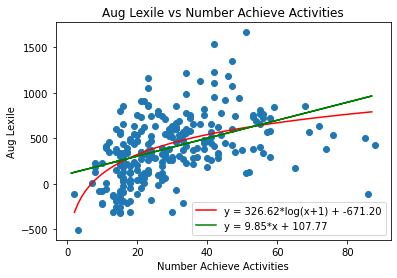

In [821]:
regression(sas,'Aug Lexile','Number Achieve Activities')

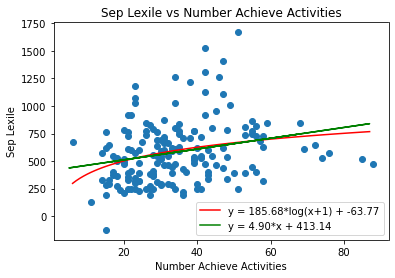

In [822]:
regression(sas,'Sep Lexile','Number Achieve Activities')

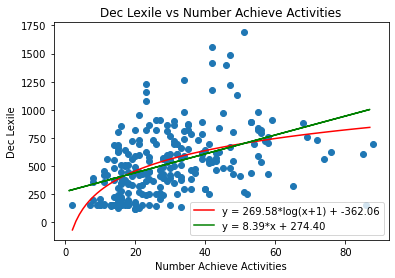

In [823]:
regression(sas,'Dec Lexile','Number Achieve Activities')

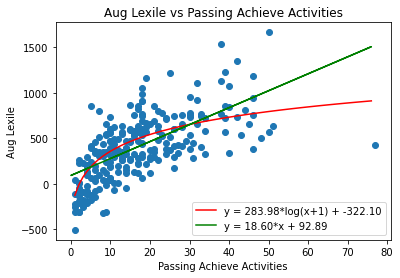

In [824]:
regression(sas,'Aug Lexile','Passing Achieve Activities')

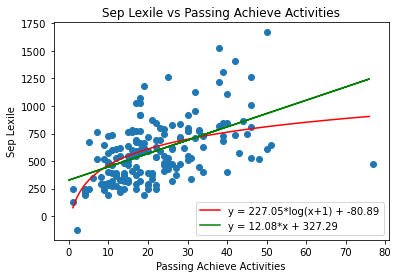

In [825]:
regression(sas,'Sep Lexile','Passing Achieve Activities')

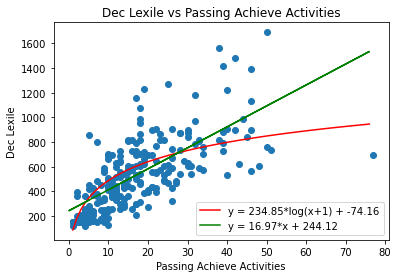

In [826]:
regression(sas,'Dec Lexile','Passing Achieve Activities')

In [810]:
farms = (sas['FARMS'].value_counts())

In [335]:
farms

Free         262
Not FARMS    118
Reduced      5  
Name: FARMS, dtype: int64

In [56]:
import matplotlib.pyplot as plt

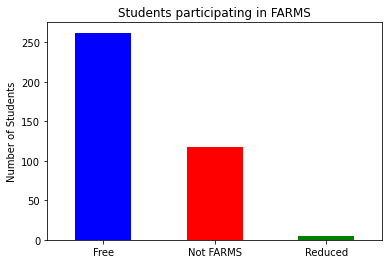

In [460]:
farms.plot(kind = 'bar', ylabel = 'Number of Students', title = 'Students participating in FARMS', rot=0, color = ['blue','red','green']).figure.savefig('FARMS1.png')

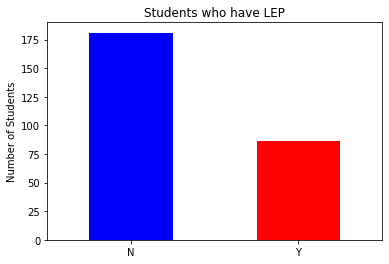

In [458]:
lep = sas['LEP '].value_counts()
lep.plot(kind='bar',ylabel = 'Number of Students',title = 'Students who have LEP', rot = 0, color = ['blue', 'red']).figure.savefig('LEP1.png')

In [461]:
lep

N    181
Y    86 
Name: LEP , dtype: int64

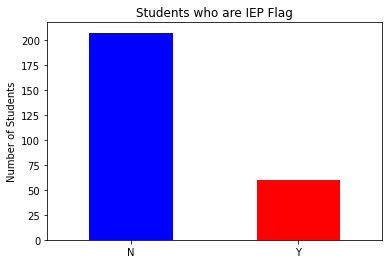

In [459]:
sas["IEP Flag"].value_counts().plot(kind='bar',y='IEP Flag', ylabel = 'Number of Students',title = 'Students who are IEP Flag', rot = 0, color = ['blue', 'red']).figure.savefig('IEP1.png')

In [470]:
sas["IEP Flag"].value_counts()

N    207
Y    60 
Name: IEP Flag, dtype: int64

Getting Attendance data

In [3]:
ma = pd.read_excel('master_attendance.xlsx')

In [18]:
for i in range(len(ma)):
    ma.iloc[i] = ma.iloc[i].str.lower()

In [19]:
md = ma.iloc[:,12:]
md = md.iloc[:,:-2]

In [30]:
dfmd = (md .stack())


In [31]:
fmd = dfmd.groupby(level=1).value_counts()

In [32]:
fmd = fmd.unstack(0)

In [33]:
fmd = fmd.T

In [34]:
fmd.iloc[72:,1].mean()

264.54285714285714

In [35]:
fmd.iloc[:,1].mean()

169.5607476635514

In [36]:
fmd

,a,p
2021-09-21,NaN,1.0
2021-09-22,9.0,78.0
2021-09-23,13.0,74.0
2021-09-24,19.0,68.0
2021-09-27,8.0,86.0
...,...,...
2022-04-05,201.0,297.0
2022-04-06,194.0,318.0
2022-04-07,201.0,319.0
2022-04-08,206.0,318.0


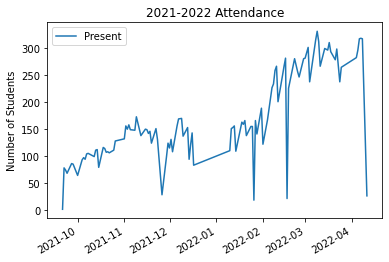

In [37]:
fmd.plot(kind='line',y=['p'], ylabel= 'Number of Students')
plt.legend(['Present'])
plt.title('2021-2022 Attendance')
plt.savefig('2021-2022 Attendance.png')
plt.show()

In [765]:
def attendance_data(md,x):
    md = md[md.loc[:,'School'] == x]
    md = md.iloc[:,12:]
    md = md.iloc[:,:-2]
    md = (md.stack().groupby(level=1).value_counts().unstack(0))
    new_md = md.rename(index = {'p': 'Present'})
    new_md.T.plot(y = 'Present', color=['blue'],ylabel = 'Number of Students', title = (x.upper() + ' Attendance')).figure.savefig(x + '.png')
    if len(new_md.T) > 40:
        print('Attendance from the beginning: ' + str(new_md.T.iloc[:,1].mean()))
        print('Attendance starting 2/8/2022: ' + str(new_md.T.iloc[72:,1].mean()))
    else:
        print('Attendance starting 2/8/2022: ' + str(new_md.T.iloc[:,1].mean()))

Attendance from the beginning: 20.03
Attendance starting 2/8/2022: 21.714285714285715


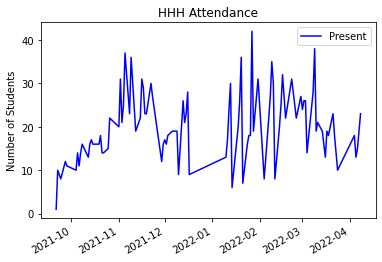

In [766]:
attendance_data(ma,'hhh')

Attendance from the beginning: 32.395604395604394
Attendance starting 2/8/2022: 58.21052631578947


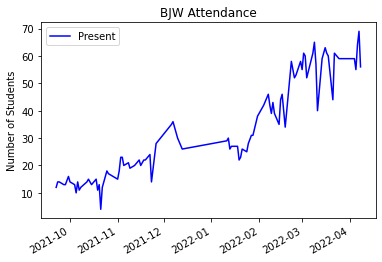

In [767]:
attendance_data(ma,'bjw')

Attendance from the beginning: 23.95098039215686
Attendance starting 2/8/2022: 28.3


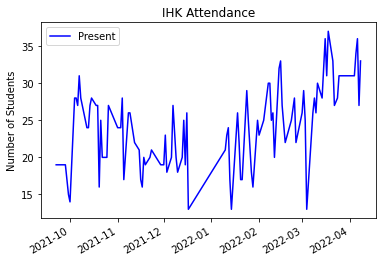

In [768]:
attendance_data(ma,'ihk')

Attendance from the beginning: 37.91089108910891
Attendance starting 2/8/2022: 48.06666666666667


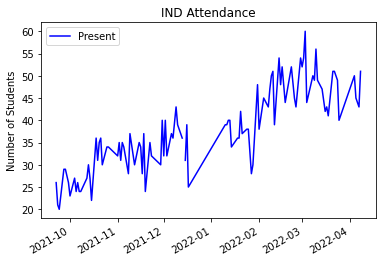

In [769]:
attendance_data(ma,'ind')

Attendance from the beginning: 40.62376237623762
Attendance starting 2/8/2022: 47.172413793103445


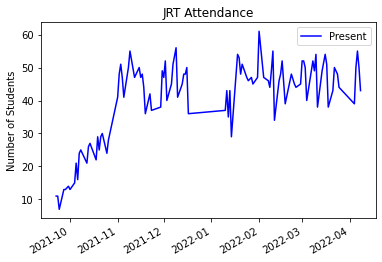

In [770]:
attendance_data(ma,'jrt')

Attendance starting 2/8/2022: 11.17142857142857
Index(['a', 'Present'], dtype='object')


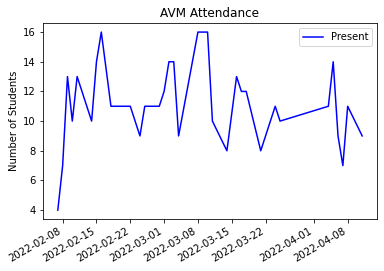

In [771]:
attendance_data(ma,'avm')

Attendance starting 2/8/2022: 13.379310344827585
Index(['a', 'Present'], dtype='object')


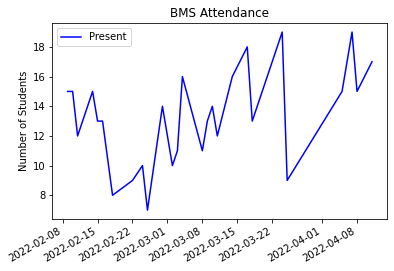

In [772]:
attendance_data(ma,'bms')

Attendance starting 2/8/2022: 19.08823529411765
Index(['a', 'Present'], dtype='object')


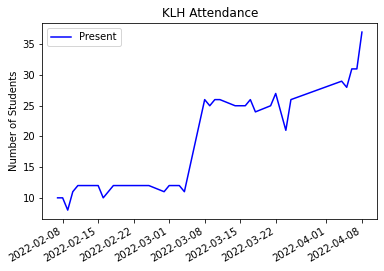

In [773]:
attendance_data(ma,'klh')

Attendance starting 2/8/2022: 27.4
Index(['a', 'Present'], dtype='object')


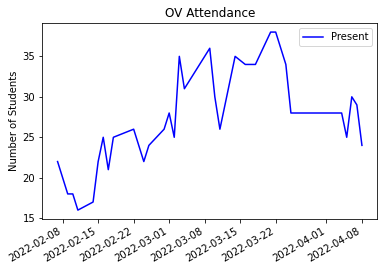

In [774]:
attendance_data(ma,'ov')

Attendance starting 2/8/2022: 12.647058823529411
Index(['a', 'Present'], dtype='object')


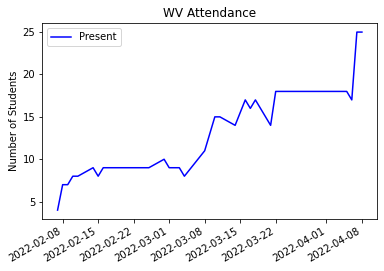

In [775]:
attendance_data(ma,'wv')